In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
import fastai
from fastai.imports import *

from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import skimage
from skimage.transform import*

/apps/software/standard/core/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
PATH = "/scratch/kk4ze/data_lowres_2200x2200_augmented_duplicated/"
sz=2200

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

In [6]:
os.listdir(PATH)

['models',
 'tmp',
 'preds_resnet34_2200_duplicates_TTA_staintools.csv',
 'logpreds_resnet34_all_layers2200x2200_duplicates_TTA_staintools.npy',
 'valid',
 '.ipynb_checkpoints',
 'train']

In [7]:
files = os.listdir(f'{PATH}valid/Celiac')[:5]
files

['C04-17_05_12764_7763_horiz__0_0.jpg',
 'C12-63_03_10776_11106_vert__1_0.jpg',
 'C07-37_06_8055_8580_vert__0_0.jpg',
 'C03-12_01_4376_5379_vert__1_0.jpg',
 'C06-33_02_8189_5011_horiz__0_0.jpg']

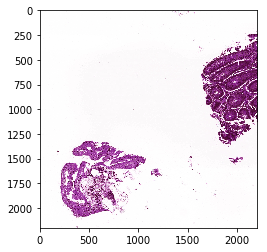

In [8]:
img = plt.imread(f'{PATH}valid/Celiac/{files[4]}')
plt.imshow(img);

In [9]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),bs=4)


In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [11]:
learn.fit(0.0005, 20)

epoch      trn_loss   val_loss   accuracy                     
    0      0.815408   0.538444   0.814394  
    1      0.607114   0.43468    0.829545                     
    2      0.653008   0.414608   0.818182                     
    3      0.521507   0.397421   0.833333                     
    4      0.583074   0.395534   0.829545                     
    5      0.572824   0.363795   0.852273                     
    6      0.533872   0.346839   0.863636                     
    7      0.590325   0.339117   0.859848                     
    8      0.493314   0.337062   0.844697                     
    9      0.489228   0.335843   0.859848                     
    10     0.490009   0.349408   0.829545                     
    11     0.432745   0.29864    0.882576                     
    12     0.393117   0.336408   0.840909                     
    13     0.493593   0.342851   0.856061                     
    14     0.491271   0.288548   0.863636                     
    15     

[0.291990982763695, 0.8863636363636364]

## Visualising Results

In [12]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# from here we know that 'Celiac' is label 0 and 'EE' is label 1 and 'Normal' is label 2
data.classes

['Celiac', 'EE', 'Normal']

In [14]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(264, 3)

Most Correct Celiac


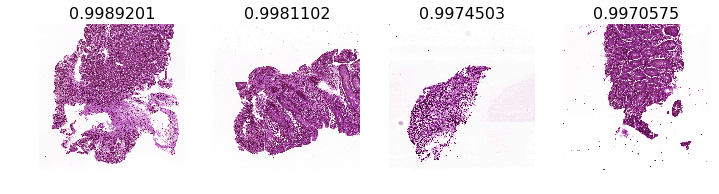

In [15]:
imr = ImageModelResults(data.val_ds, log_preds)
print('Most Correct Celiac')
imr.plot_most_correct(0)

Most Correct EE


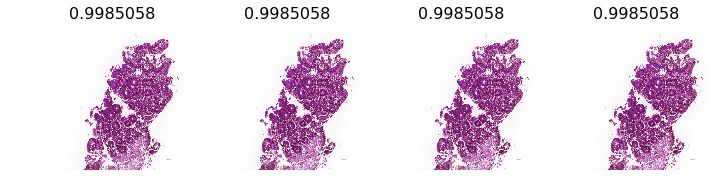

In [16]:
print('Most Correct EE')
imr.plot_most_correct(1)

Most Correct Normal


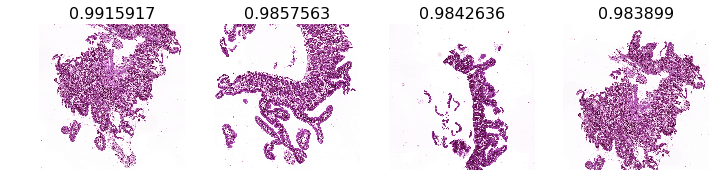

In [17]:
print('Most Correct Normal')
imr.plot_most_correct(2)

Most Incorrect Celiac


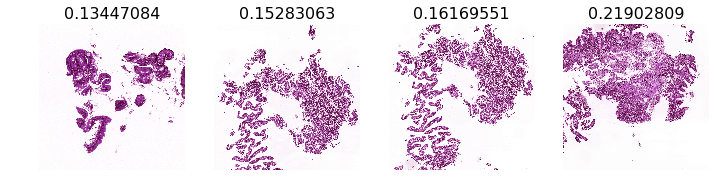

In [18]:
print('Most Incorrect Celiac')
imr.plot_most_incorrect(0)

In [19]:
print('Most Incorrect EE')
imr.plot_most_incorrect(1)

Most Incorrect EE


False

Most Incorrect Normal


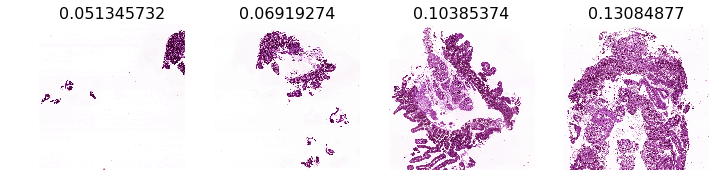

In [20]:
print('Most Incorrect Normal')
imr.plot_most_incorrect(2)

In [21]:
preds = np.argmax(log_preds, axis=1)

In [22]:
y = data.val_y

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[76  2 12]
 [ 0 96  0]
 [12  4 62]]


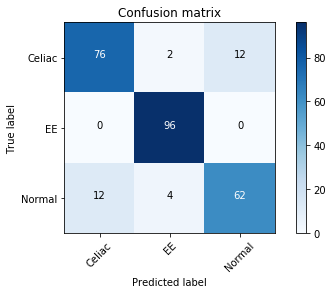

In [24]:
plot_confusion_matrix(cm, data.classes)

## Finding a optimum learning rate

In [25]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [26]:
lrf=learn.lr_find()

 67%|██████▋   | 192/287 [00:00<00:01, 56.50it/s, loss=2.63]


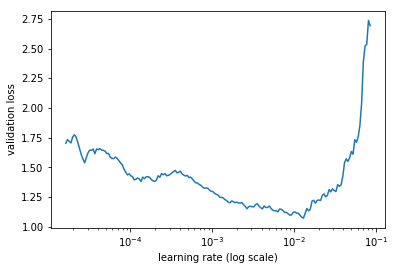

In [27]:
learn.sched.plot()

## Data Augmentation

In [28]:
# Using predefined augmentations transforms_top_down
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

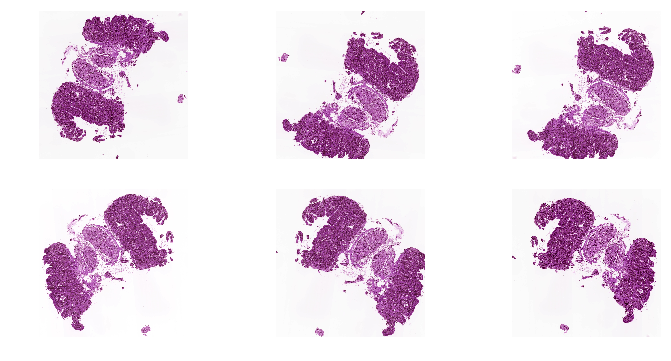

In [29]:
# Visualising the augmentation
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]
ims = np.stack([get_augs() for i in range(6)])
plots(ims, rows=2)

In [30]:
# Initializing the data with augmentation and learn method
data = ImageClassifierData.from_paths(PATH, tfms=tfms,bs=4)
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.precompute = False

In [31]:
lrf=learn.lr_find()

 67%|██████▋   | 191/287 [02:18<01:05,  1.45it/s, loss=4]   

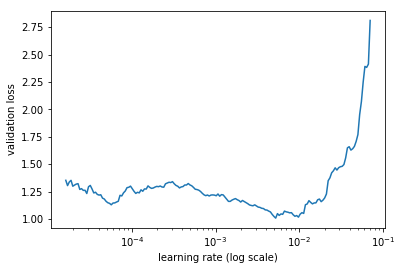

In [32]:
learn.sched.plot()

In [33]:
learn.fit(0.0008, 12, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.869933   0.727474   0.768939  
    1      0.756461   0.560898   0.859848                    
    2      0.743543   0.583712   0.757576                    
    3      0.740264   0.604577   0.768939                    
    4      0.646936   0.519566   0.765152                    
    5      0.687731   0.476595   0.833333                    
    6      0.647791   0.485909   0.795455                    
    7      0.620193   0.474868   0.825758                    
    8      0.647748   0.479865   0.82197                     
    9      0.629595   0.444197   0.840909                    
    10     0.615156   0.504304   0.791667                    
    11     0.631361   0.442987   0.837121                    


[0.4429868543238351, 0.8371212121212122]

In [34]:
learn.save('2200_lastlayer_duplicated_resnet34_lowres_staintools')

In [ ]:
learn.load('2200_lastlayer_duplicated_resnet34_lowres_staintools')

## Creating GradCam Heatmaps

In [35]:
def get_cat_name(a):
    if a == 0:
        return 'Celiac'
    elif a == 1:
        return 'EE'
    elif a == 2:
        return 'Normal'
    else:
        return 'Something Wrong with label!'

In [42]:
class SaveFeatures():
    features=None
    def __init__(self, m): self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): self.features = output
    def remove(self): self.hook.remove()


def plt_heatmap_celiac():
    
    m = nn.Sequential(*children(learn.model))
    figure = plt.figure(figsize=(20, 20))

    for i in range(4):
        subplot = figure.add_subplot(3, 3, i+1)
        subplot.axis('Off')
        x,y = next(iter(data.val_dl))
        x,y = x[None,i], y[None,i]
        subplot.set_title(get_cat_name(y))
        vx = Variable(x.cuda(), requires_grad=True)
        dx = data.val_ds.denorm(x)[0]
        sfs = [SaveFeatures(o) for o in [m[-11][2]._modules['conv2']]]
        py = m(vx)
        for o in sfs: o.remove()
        feat = np.maximum(0,to_np(sfs[0].features[0]))
        vx = Variable(x.cuda(), requires_grad=True)
        py = np.exp(to_np(py)[0])
        params = list(m.parameters())
        weight_softmax = np.squeeze(params[-2].data.cpu().numpy())
        f2=np.dot(np.rollaxis(feat,0,3), weight_softmax[0])
        f2-=f2.min()
        f2/=f2.max()
        plt.imshow(dx)
        plt.imshow(scipy.misc.imresize(f2, dx.shape), alpha=0.5, cmap='hot');
        
def plt_heatmap_EE():
    
    m = nn.Sequential(*children(learn.model))
    figure = plt.figure(figsize=(20, 20))
    batch_iter = iter(data.val_dl)
    for k in range(23):
        next(batch_iter)
#         print(k)
    print('Iterated!')
    for i in range(4):
        subplot = figure.add_subplot(9, 3, i+1)
        subplot.axis('Off')
        x,y = next(batch_iter)
        x,y = x[None,i], y[None,i]
        subplot.set_title(get_cat_name(y))
        vx = Variable(x.cuda(), requires_grad=True)
        dx = data.val_ds.denorm(x)[0]
        sfs = [SaveFeatures(o) for o in [m[-11][2]._modules['conv2']]]
        py = m(vx)
        for o in sfs: o.remove()
        feat = np.maximum(0,to_np(sfs[0].features[0]))
        vx = Variable(x.cuda(), requires_grad=True)
        py = np.exp(to_np(py)[0])
        params = list(m.parameters())
        weight_softmax = np.squeeze(params[-2].data.cpu().numpy())
        f2=np.dot(np.rollaxis(feat,0,3), weight_softmax[0])
        f2-=f2.min()
        f2/=f2.max()
        plt.imshow(dx)
        plt.imshow(scipy.misc.imresize(f2, dx.shape), alpha=0.5, cmap='hot');
        
def plt_heatmap_Normal():
    m = nn.Sequential(*children(learn.model))
    figure = plt.figure(figsize=(20, 20))
    batch_iter = iter(data.val_dl)
    for k in range(47):
        next(batch_iter)
#         print(k)
    print('Iterated!')
    for i in range(4):
        subplot = figure.add_subplot(9, 3, i+1)
        subplot.axis('Off')
        x,y = next(batch_iter)
        x,y = x[None,i], y[None,i]
        subplot.set_title(get_cat_name(y))
        vx = Variable(x.cuda(), requires_grad=True)
        dx = data.val_ds.denorm(x)[0]
        sfs = [SaveFeatures(o) for o in [m[-11][2]._modules['conv2']]]
        py = m(vx)
        for o in sfs: o.remove()
        feat = np.maximum(0,to_np(sfs[0].features[0]))
        vx = Variable(x.cuda(), requires_grad=True)
        py = np.exp(to_np(py)[0])
        params = list(m.parameters())
        weight_softmax = np.squeeze(params[-2].data.cpu().numpy())
        f2=np.dot(np.rollaxis(feat,0,3), weight_softmax[0])
        f2-=f2.min()
        f2/=f2.max()
        plt.imshow(dx)
        plt.imshow(scipy.misc.imresize(f2, dx.shape), alpha=0.5, cmap='hot');

/apps/software/standard/core/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


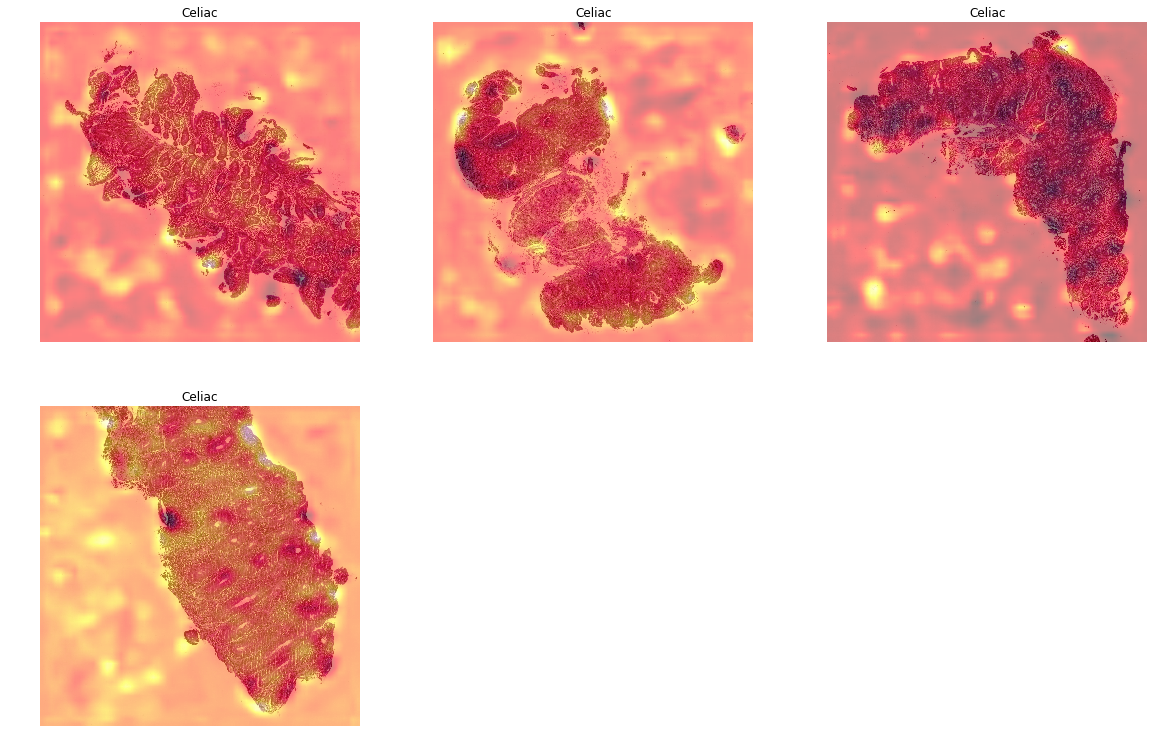

In [37]:
plt_heatmap_celiac()

Iterated!


/apps/software/standard/core/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:64: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


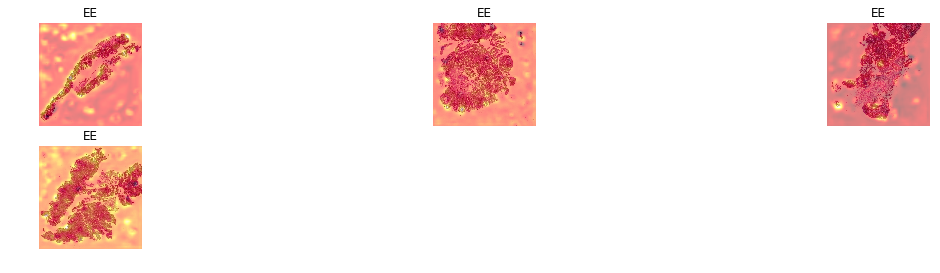

In [40]:
plt_heatmap_EE()

Iterated!


/apps/software/standard/core/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:94: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


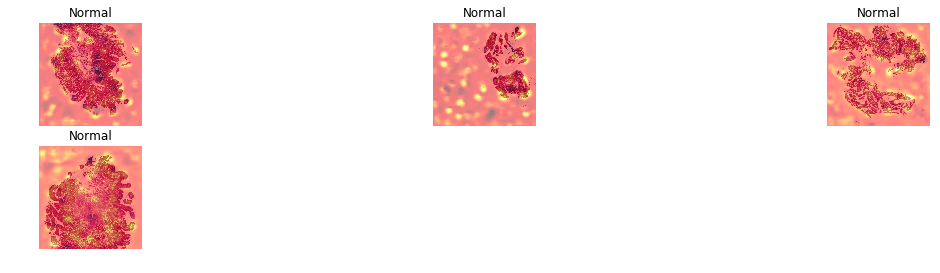

In [43]:
plt_heatmap_Normal()

## Analyzing results

### Confusion Matrix and Accuracy with Test Time Augmentation

In [44]:
# Getting log predictions with TTA
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.8181818181818182

In [47]:
log_preds.shape

(5, 264, 3)

In [76]:
np.save('/scratch/kk4ze/data_lowres_2200x2200_augmented_duplicated/logpreds_resnet34_all_layers2200x2200_duplicates_TTA_staintools.npy', log_preds)

In [42]:
log_preds = np.load('/scratch/kk4ze/data_lowres_2200x2200_augmented_duplicated/logpreds_resnet34_all_layers2200x2200_duplicates_TTA_staintools.npy')

In [50]:
log_preds_mean = np.mean(log_preds, 0)

In [51]:
preds = np.argmax(probs, axis=1)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[64  6 20]
 [ 0 79 17]
 [ 1  4 73]]


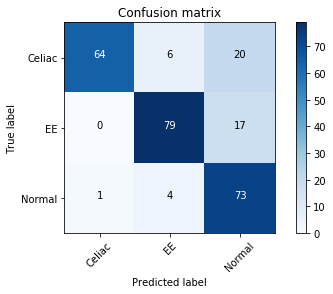

In [53]:
plot_confusion_matrix(cm, data.classes)

### Visualizing results with TTA

Most Correct Celiac


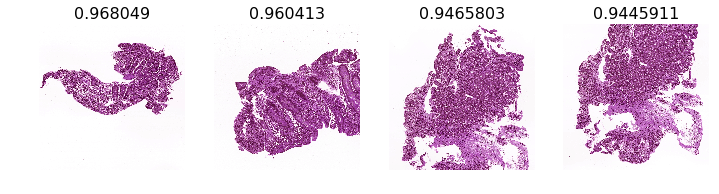

In [54]:
imr = ImageModelResults(data.val_ds, log_preds_mean)
print('Most Correct Celiac')
imr.plot_most_correct(0)

Most Correct EE


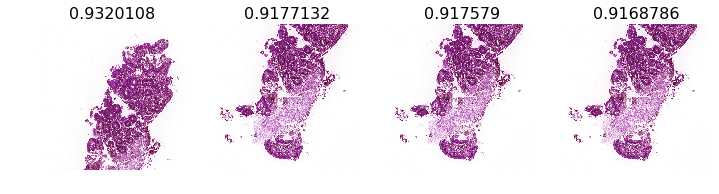

In [55]:
print('Most Correct EE')
imr.plot_most_correct(1)

Most Correct Noraml


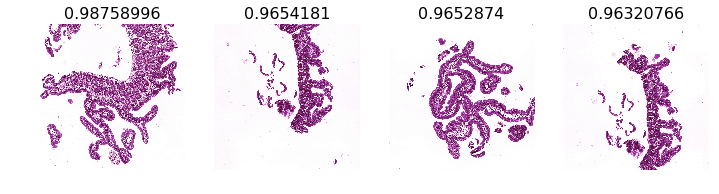

In [56]:
print('Most Correct Noraml')
imr.plot_most_correct(2)

Most Incorrect Celiac


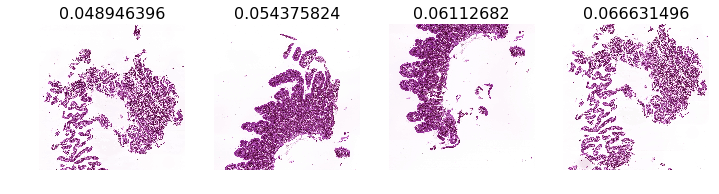

In [57]:
print('Most Incorrect Celiac')
imr.plot_most_incorrect(0)

Most Incorrect EE


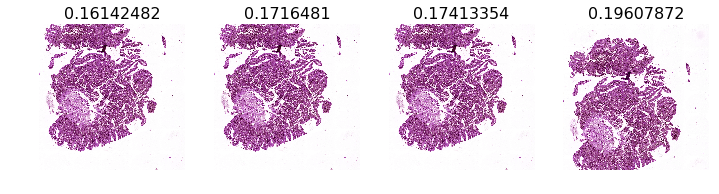

In [58]:
print('Most Incorrect EE')
imr.plot_most_incorrect(1)

Most Incorrect Normal


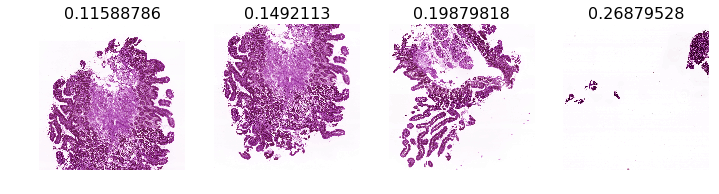

In [59]:
print('Most Incorrect Normal')
imr.plot_most_incorrect(2)

Most Uncertain Celiac


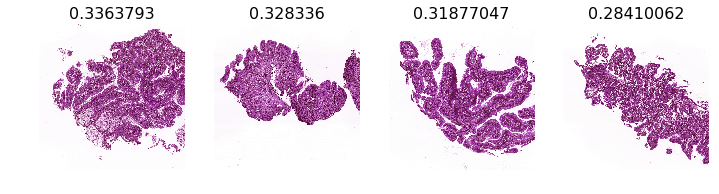

In [60]:
print('Most Uncertain Celiac')
imr.plot_most_uncertain(0)

Most Uncertain EE


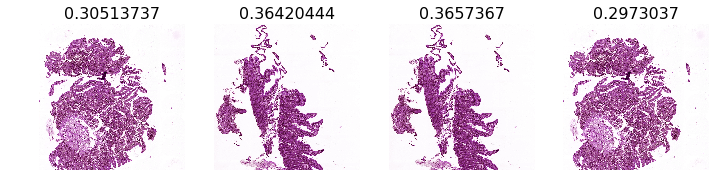

In [61]:
print('Most Uncertain EE')
imr.plot_most_uncertain(1)

Most Uncertain Normal


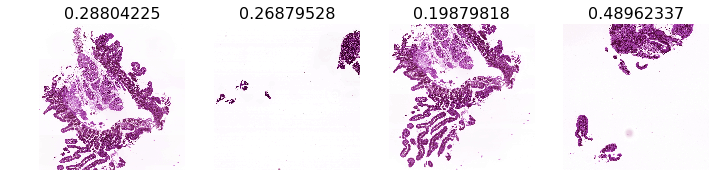

In [62]:
print('Most Uncertain Normal')
imr.plot_most_uncertain(2)

### Confusion Matrix and Accuracy without Test Time Augmentation

In [63]:
# Getting log predictions without TTA
log_preds = learn.predict()

In [64]:
preds = np.argmax(log_preds, axis=1)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[66  3 21]
 [12 66 18]
 [ 3  4 71]]


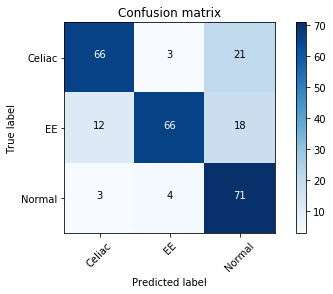

In [66]:
plot_confusion_matrix(cm, data.classes)

## Saving predictions of the model with TTA

In [67]:
np.exp(log_preds_mean)

array([[0.2841 , 0.21471, 0.45671],
       [0.8371 , 0.09521, 0.04052],
       [0.72519, 0.03799, 0.18243],
       [0.86918, 0.06815, 0.04172],
       [0.75649, 0.03854, 0.18437],
       [0.90612, 0.02317, 0.03025],
       [0.33638, 0.0104 , 0.62794],
       [0.94658, 0.00354, 0.04378],
       [0.11964, 0.11004, 0.67322],
       [0.41204, 0.13221, 0.40837],
       [0.46342, 0.01958, 0.47509],
       [0.87484, 0.01994, 0.08222],
       [0.06113, 0.00559, 0.91352],
       [0.81122, 0.05882, 0.11506],
       [0.2063 , 0.04907, 0.7163 ],
       [0.65242, 0.12496, 0.15921],
       [0.96805, 0.003  , 0.02259],
       [0.79004, 0.10416, 0.06386],
       [0.24963, 0.73882, 0.00507],
       [0.7367 , 0.13961, 0.08715],
       [0.96041, 0.0029 , 0.03536],
       [0.71414, 0.04348, 0.19506],
       [0.24838, 0.34543, 0.31008],
       [0.16677, 0.07039, 0.71319],
       [0.19924, 0.30709, 0.45063],
       [0.56989, 0.12893, 0.21006],
       [0.14479, 0.00309, 0.82358],
       [0.2342 , 0.10035, 0.

In [68]:
res = pd.DataFrame(np.exp(log_preds_mean))

In [69]:
res['file'] = data.val_ds.fnames

In [70]:
res.columns = ['Celiac', 'EE', 'Normal', 'FileName']

In [74]:
res.to_csv('/scratch/kk4ze/data_lowres_2200x2200_augmented_duplicated/preds_resnet34_2200_duplicates_TTA_staintools.csv')

In [75]:
res.head()

Celiac        EE    Normal  \
0  0.284101  0.214714  0.456706   
1  0.837097  0.095209  0.040524   
2  0.725195  0.037987  0.182427   
3  0.869180  0.068148  0.041717   
4  0.756487  0.038542  0.184370   

                                           FileName  
0  valid/Celiac/C04-17_05_12764_7763_horiz__0_0.jpg  
1  valid/Celiac/C12-63_03_10776_11106_vert__1_0.jpg  
2    valid/Celiac/C07-37_06_8055_8580_vert__0_0.jpg  
3    valid/Celiac/C03-12_01_4376_5379_vert__1_0.jpg  
4   valid/Celiac/C06-33_02_8189_5011_horiz__0_0.jpg